# Make predictions

## Load data and investigate

In [1]:
import csv
import sys
import ast
import pandas as pd
import numpy as np

# Parameter setting

# model
#checkpoint = 'bert-base-uncased' 
checkpoint ='jlsalim/bert-uncased-idiomatic-literal-recognizer'

# full sentences or preprocessed (filtered to content words of specific POS)
preprocessed = False 
#preprocessed = True

#remove_CLS_SEP = True 
remove_CLS_SEP = False


# load pkl-file
import pickle
if preprocessed == True:
    prep = "_preprocessed_"
else:
    prep = "_"

if remove_CLS_SEP == True:
    cls_sep = "_without_CLS_SEP"
else:
    cls_sep = ""

checkpoint_write = checkpoint.replace("/", "_").replace("\\", "_")
dataA = pd.read_pickle("dataA"+ prep + checkpoint_write + cls_sep + ".pkl")


In [2]:

f = open('results.txt', 'a')
f.write("\n" "=================================================")
f.write("\n" +"checkpoint = " + checkpoint)
if prep == "_preprocessed_":
    f.write("\n" +"preprocessed: True " + "noun, verb")
else: 
    f.write("\n" +"preprocessed: False")
if cls_sep == "_without_CLS_SEP":
    f.write("\n" + "CLS and SEP Tokens removed")
else:
    f.write("\n" + "without CLS and SEP Tokens removed")

f.write("\n" "-------------------------------------------------")
f.close()

# file to collect results "results.txt"


In [3]:
dataA["subset"].value_counts()

Extended Evaluation    100
Train                   60
Dev                     15
Test                    15
Sample                  10
Name: subset, dtype: int64

In [4]:
dataA['sentence_type'].value_counts()

idiomatic    39
literal      31
Name: sentence_type, dtype: int64

In [5]:
# returns the dataframe sample and train (data items that have literal/idiomatic information given)
def only_train(dataA): # returns the dataframe sample and train (data items that have literal/idiomatic information given)
    return pd.concat([dataA[dataA["subset"] == "Sample"],dataA[dataA["subset"]== "Train"]])

# returns the dataframe of subset
def only_subset(dataA, subset): # returns the dataframe sample and train (data items that have literal/idiomatic information given)
    return dataA[dataA["subset"] == subset]

In [6]:
# generates submission file from column for subset
from zipfile import ZipFile
def make_submission(dataA, column, subset):
    if subset == "Dev":
        name = "EN"
    if subset == "Extended Evaluation":
        name = "xe"
    if subset == "Test":
        name = "EN"
    full_name = "submission_" + name
    subset_data = only_subset(dataA,subset)
    submission_df = pd.DataFrame()
    submission_df["compound"] = subset_data["compound"]
    submission_df["expected_order"] = subset_data[column]
    submission_df.to_csv(full_name + ".tsv", sep="\t", index=False)
    ZipFile(full_name + '.zip', 'w').write(full_name + '.tsv')
    print("File zipped and saved as " +  full_name + ".zip")




In [7]:
# functions to display images

from PIL import Image
from IPython.display import display


fileDirectory = 'D:\\Wiebke Petersen\\Downloads\\AdMIRe Subtask A Train\\train'

# Open the image file
def display_image(compound, fn):
    img = Image.open(fileDirectory + "\\" + compound + "\\" + fn)
    new_size = (150, 150)  # Width, Height
    img_resized = img.resize(new_size)  
    # Display the image
    display(img_resized)

# returns list of image names sorted from image1 to image5
def get_image_names(n,mydata):
    names = []
    for i in [1,2,3,4,5]:
         names.append(mydata['image' + str(i) + '_name'][n])
    return names


In [8]:
# print information of 1 item:

def print_item(n, mydata):
    # print  'sentence_type', 'sentence'
    compound = mydata['compound'][n]
    print(compound)
    print(mydata['sentence_type'][n])
    print(mydata['sentence'][n])
    print('---------------------------------------------------------------------')


    # for image_names in 'expected_order' print image_captions
    names  =  get_image_names(n,mydata)
    expected_order = mydata['expected_order'][n]
    print(expected_order)

    for image_name in expected_order:
        display_image(compound, image_name)
        # get index of image_name in names
        index = names.index(image_name) + 1
        print(mydata['image'+str(index)+'_caption'][n])
    

green fingers
literal
The toddler ran in and proudly held up a picture of a tree as her green fingers threatened to smear paint on the kitchen walls and cupboards.
---------------------------------------------------------------------
['38213294711.png', '92628846416.png', '88406435457.png', '10027562830.png', '88683770392.png']


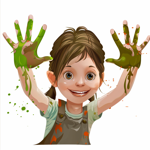

The image depicts a cartoon-style illustration of a young girl with brown hair tied back in a ponytail. She is wearing overalls and has paint splatters on her hands, face, and clothing. The paint appears to be green and orange, suggesting she might have been involved in some form of creative activity or playtime. Her expression is cheerful and enthusiastic, with wide eyes and a big smile, indicating she is enjoying herself. The background is plain white, which helps to focus attention on the girl and her colorful paint splatters.


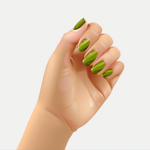

The image depicts a close-up of a human hand with the palm facing upwards and fingers slightly curled. The hand appears to be of a light skin tone, and it is holding a small object that is not visible in the image. The nails on the fingers are painted with a glossy, dark green nail polish. The lighting in the image is soft, creating subtle shadows and highlights on the hand, which gives it a realistic appearance. The background is plain and white, ensuring that the focus remains solely on the hand and its details. There are no other objects or elements present in the image.


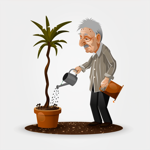

The image depicts an elderly man with gray hair and a mustache, wearing a light-colored shirt and dark pants. He is standing next to a potted plant, which appears to be a small palm tree or similar type of plant. The man is holding a watering can in his right hand and a smaller container in his left hand. He is in the process of watering the plant, pouring water from the watering can onto the soil in the pot. The background is plain and white, focusing attention on the man and the plant. The overall scene suggests a nurturing activity, possibly related to gardening or plant care.


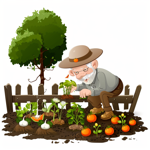

The image depicts an elderly man engaged in gardening activities. He is crouching down next to a small garden bed, which is enclosed by a wooden fence. The garden bed contains various plants and vegetables, including tomatoes, garlic, and what appears to be young seedlings or small plants. \n\nThe man is wearing a light-colored shirt, brown pants, and a wide-brimmed hat with a small orange decoration on the brim. He has a white beard and glasses, suggesting he might be older. His expression seems focused as he tends to the plants.\n\nIn the background, there is a tree with green leaves, providing some shade over the garden bed. The tree is situated behind the fence, adding a natural element to the scene. The ground around the garden bed is covered with dark soil, indicating that it is actively being cultivated.\n\nThere are several tomatoes visible in the garden bed, some of which are already fully grown while others are still small and green. Garlic bulbs are also present, identifiabl

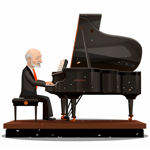

The image depicts an elderly man playing the piano. He is seated on a black stool with orange accents, positioned in front of a large, dark-colored grand piano. The piano has a shiny, reflective surface and is placed on a raised platform. The man is dressed in a formal suit with a red tie, and he appears to be focused on playing the instrument. The background is plain white, which helps to emphasize the subject and the piano. The overall scene suggests a classical music performance or practice session.


In [9]:
dataA_train = only_train(dataA)
print_item(10,dataA_train)

In [10]:
# add opposite sentence_type for each compound in extended data that is also in train/sample
# it is not guaranteed that this is the correct sentence_type
# no cheating: the extended data is only used to measure accuracy on a bigger dataset.

dataA_train = only_train(dataA)
dataA_train = dataA_train.reset_index(drop=True)
train_compounds = [(dataA_train["compound"][i], dataA_train["sentence_type"][i], list(dataA_train["expected_order"][i])) for i in range(len(dataA_train))]
def cheat_items(item):
    new_order = [3,2,1,0,4]
    if item["subset"] == "Extended Evaluation":
        compound = item["compound"]
        t = [triple for triple in train_compounds if triple[0] == compound]
        if t != []:
            (c,sent_type,order) = t[0]
            if sent_type == "literal":
                item["sentence_type"] = "idiomatic"
            else: 
                item["sentence_type"] = "literal"
            item["expected_order"] = [order[i] for i in new_order]
        else: 
            item["sentence_type"] = None
            item["expected_order"] = None
    return item

dataA = dataA.apply(lambda x: cheat_items(x), axis=1)    

## Binary classification idiomatic/literal via cosine similarities 

### Binary classification (idiomatic/literal) via cosine similarities using chatGPT data and BERT embeddings

In [11]:
def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))


def compare(emb,emb0,emb1):
    sim0 = cosine_similarity(emb,emb0)
    sim1 = cosine_similarity(emb,emb1)
    if sim0 > sim1:
        return 0
    else:
        return 1

def binary2values(list,val0,val1):
    final = []
    for element in list:
        if element == 1:
            final.append(val1)
        else:
            final.append(val0)
    return final


##### sentence embedding versus gpt sentence/meaning embedding

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# only training data has sentence_type information
dataA_train = only_train(dataA)


compound_methods = ['meanSecondToLast','meanLast4','meanLast','meanFirst']
methods = ['meanSecondToLast','meanLast4','meanLast','meanFirst','firstCLS','lastCLS']

# systematic analysis sentence compared to gpt sentence embeddings
gpt_sents = ["sentence", "meaning"]

# write results to file results.txt
f = open('results.txt', 'a')
f.write("\n" +"Binary classification")
f.write("\n" +"sentence compared to gpt sentence embeddings")

print("sentence compared to gpt sentence embeddings")

for sent in gpt_sents:
    for m in methods:
        pred = dataA.apply(lambda x: compare(x["sentence_embedding_" + m],
                                         x["gpt_literal_" + sent + "_embedding_" + m], 
                                         x["gpt_idiomatic_" + sent + "_embedding_" + m]), axis=1)
        pred = binary2values(pred,"literal","idiomatic")
        dataA["pred_sentence_embedding_compared_to_gpt_" + sent + "_embedding_" +m  ] =pred

        dataA_train = only_train(dataA)
        pred = dataA_train["pred_sentence_embedding_compared_to_gpt_" + sent + "_embedding_" +m ]
        # evaluate
        print(sent + "_embedding_" + m)
        y = dataA_train["sentence_type"]
        print(round(accuracy_score(y, pred),3))
        f.write("\n" +str(round(accuracy_score(y, pred),3))+  " -- " + sent + "_embedding_" + m)

#        print(classification_report(y, pred,zero_division=0))

f.write("\n" +"-----------------")
f.close()


sentence compared to gpt sentence embeddings
sentence_embedding_meanSecondToLast
0.957
sentence_embedding_meanLast4
0.943
sentence_embedding_meanLast
0.971
sentence_embedding_meanFirst
0.557
sentence_embedding_firstCLS
0.557
sentence_embedding_lastCLS
0.957
meaning_embedding_meanSecondToLast
0.886
meaning_embedding_meanLast4
0.871
meaning_embedding_meanLast
0.914
meaning_embedding_meanFirst
0.6
meaning_embedding_firstCLS
0.557
meaning_embedding_lastCLS
0.871


In [13]:
# classification report for winning system
for sent in ["sentence"]:
    for m in ["meanLast"]:
        pred = dataA.apply(lambda x: compare(x["sentence_embedding_" + m],
                                         x["gpt_literal_" + sent + "_embedding_" + m], 
                                         x["gpt_idiomatic_" + sent + "_embedding_" + m]), axis=1)
        pred = binary2values(pred,"literal","idiomatic")
        dataA["pred_sentence_embedding_compared_to_gpt_" + sent + "_embedding_" +m  ] =pred

        dataA_train = only_train(dataA)
        pred = dataA_train["pred_sentence_embedding_compared_to_gpt_" + sent + "_embedding_" +m ]
        # evaluate
        print(sent + "_embedding_" + m)
        y = dataA_train["sentence_type"]
        print(classification_report(y, pred))


sentence_embedding_meanLast
              precision    recall  f1-score   support

   idiomatic       1.00      0.95      0.97        39
     literal       0.94      1.00      0.97        31

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



##### compound in sentence embedding versus compound in gpt sentence/meaning embedding

In [14]:
# systematic analysis compound embeddings
gpt_sents = ["sentence", "meaning"]

f = open('results.txt', 'a')
f.write("\n" +"compound in sentence compared to gpt compound in sentence embeddings")
print("compound in sentence compared to gpt compound in sentence embeddings")

for sent in gpt_sents:
    for m in compound_methods:
        pred = dataA.apply(lambda x: compare(x["compound_embedding_sentence_" + m],
                                         x["compound_embedding_gpt_literal_" + sent + "_" + m], 
                                         x["compound_embedding_gpt_idiomatic_" + sent + "_" + m]), axis=1)
        pred = binary2values(pred,"literal","idiomatic")
        dataA["pred_compound_embedding_sentence_compared_to_compound_embedding_gpt_" + sent + "_" +m  ] = pred

        dataA_train = only_train(dataA)
        pred = dataA_train["pred_compound_embedding_sentence_compared_to_compound_embedding_gpt_" + sent + "_" +m  ] 

        # evaluate
        print(sent + "_embedding_" + m)
        y = dataA_train["sentence_type"]
        print(round(accuracy_score(y, pred),3))
        f.write("\n" + str(round(accuracy_score(y, pred),3)) + " -- "  +sent + "_embedding_" + m)

        
#        print(classification_report(y, pred,zero_division=0))

f.write("\n" +"-----------------")
f.close()



compound in sentence compared to gpt compound in sentence embeddings
sentence_embedding_meanSecondToLast
0.971
sentence_embedding_meanLast4
0.971
sentence_embedding_meanLast
0.986
sentence_embedding_meanFirst
0.471
meaning_embedding_meanSecondToLast
0.886
meaning_embedding_meanLast4
0.843
meaning_embedding_meanLast
0.9
meaning_embedding_meanFirst
0.543


In [15]:
# systematic analysis compound embeddings of winning systems
gpt_sents = ["sentence"]

print("compound in sentence compared to gpt compound in sentence embeddings")
for sent in gpt_sents:
    for m in ["meanLast"]:

        dataA_train = only_train(dataA)
        pred = dataA_train["pred_compound_embedding_sentence_compared_to_compound_embedding_gpt_" + sent + "_" +m  ] 

        # evaluate
        print(sent + "_embedding_" + m)
        y = dataA_train["sentence_type"]
        print(round(accuracy_score(y, pred),3))
        print(classification_report(y, pred,zero_division=0))


compound in sentence compared to gpt compound in sentence embeddings
sentence_embedding_meanLast
0.986
              precision    recall  f1-score   support

   idiomatic       1.00      0.97      0.99        39
     literal       0.97      1.00      0.98        31

    accuracy                           0.99        70
   macro avg       0.98      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



In [16]:
# select best classificator:

pred_all = dataA["pred_compound_embedding_sentence_compared_to_compound_embedding_gpt_sentence_meanLast"] 
dataA["binary_pred"] = pred_all

dataA_train = only_train(dataA)
print(accuracy_score(dataA_train["binary_pred"].tolist(),dataA_train["sentence_type"].tolist()))
dataA_trainext = dataA[dataA["sentence_type"].notnull()] 
print(accuracy_score(dataA_trainext["binary_pred"].tolist(),dataA_trainext["sentence_type"].tolist()))



0.9857142857142858
0.9357142857142857


### binary prediction on sBERT
For completion: predict binary decision idiomatic/literal on cosine similarities of sBERT embeddings   
Forecast: bad results


In [17]:
def idiomatic_literal_prediction(current, sent_type):
    sims = model.similarity(current["sentence_embedding_sbert"], [current["gpt_idiomatic_" + sent_type + "_embedding_sbert"], 
                                                                  current["gpt_literal_" + sent_type +  "_embedding_sbert"]])
    sims = sims.numpy()
    if np.argmax(sims[0]) == 0:
        return "idiomatic"
    else:
        return "literal"


In [32]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
f = open('results_rankings.txt', 'a')
f.write("\n" "-------------------------------------------------")
f.write("\n" + "binary classification literal/idiomatic with SBERT embeddings:")

for sent_type in ["image", "sentence", "meaning"]:
    dataA["binary_pred_sbert"] = dataA.apply(lambda x: idiomatic_literal_prediction(x, sent_type), axis = 1)
    dataA_train = only_train(dataA)
    dataA_trainext = dataA[dataA["sentence_type"].notnull()] 
    print("accuracy",sent_type,accuracy_score(dataA_train["binary_pred_sbert"], dataA_train["sentence_type"]))
    f.write("\n" + sent_type)
    f.write("\n" + "top1 accuracy " +  str(top1accuracy(dataA_train["binary_pred_sbert"],  dataA_train["sentence_type"])))
    print("on extended accuracy",sent_type,accuracy_score(dataA_trainext["binary_pred_sbert"], dataA_trainext["sentence_type"]))

f.close()

C:\Users\Wiebke Petersen\AppData\Roaming\Python\Python311\site-packages\sentence_transformers\util.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  a = torch.tensor(a)


accuracy image 0.6
on extended accuracy image 0.6071428571428571
accuracy sentence 0.7857142857142857
on extended accuracy sentence 0.7785714285714286
accuracy meaning 0.8142857142857143
on extended accuracy meaning 0.8071428571428572


## Make Ranking Predictions 

In [33]:
from scipy.stats import spearmanr
import numpy as np


# evaluation functions for ranked orders
def top1accuracy(pred_rankings,expected_order):
    pred_rankings = pred_rankings.to_list()
    expected_order = expected_order.to_list()
    correct = 0
    for i in range(len(pred_rankings)):
        if pred_rankings[i][0] == expected_order[i][0]:
            correct += 1
    return round(correct/len(pred_rankings),3)


def spearman_correlation(pred_rankings,expected_order):
    pred_rankings = pred_rankings.to_list()
    expected_order = expected_order.to_list()
    corr = []
    for i in range(len(pred_rankings)):
        corr.append(spearmanr(pred_rankings[i],expected_order[i]).correlation)
    return round(np.mean(corr),3)


In [34]:
def sim_scores(current, comparator,method):
    # input = current line(example) & embeddings for sentence + captions
    
    scores = {}
    # keys = image names
    # values = scores
    embeddings = [current[comparator+ "_embedding_" + method], 
                 current["image1_caption_embedding_" + method],
                 current["image2_caption_embedding_" + method],
                 current["image3_caption_embedding_" + method],
                 current["image4_caption_embedding_" + method],
                 current["image5_caption_embedding_" + method]]

    #embeddings = model.encode(sentences)
    similarities = model.similarity(embeddings[0], embeddings)
    # compares the embedding for the sentence including the compound 
    # with each of the embeddings, including itself and all the captions

    # [0][x] required because similarities tensor has additional layer
    score1 = similarities[0][1].item()
    scores[current["image1_name"]] = score1

    score2 = similarities[0][2].item()
    scores[current["image2_name"]] = score2

    score3 = similarities[0][3].item()
    scores[current["image3_name"]] = score3

    score4 = similarities[0][4].item()
    scores[current["image4_name"]] = score4

    score5 = similarities[0][5].item()
    scores[current["image5_name"]] = score5
    
    return scores

In [35]:
def rank_images(scores):
    ranking = []
    # scores = dictionary containing the cos similarity scores
    # comparing the sentence with the captions of the five images
    # keys = image names
    # values = scores

    for i in range(5):
        # find key which corresponds to the highest value
        m = max(scores, key=scores.get)
        # add the key (image name) to the ranking
        ranking.append(m)
        # delete the entry in the dictionary
        del scores[m]

    return ranking

In [36]:
def dependent_preds(current, comparator, method):
    pred = current["binary_pred"]
    return rank_images(sim_scores(current, "gpt_" + pred + "_" + comparator , method))

In [37]:

dataA_train = only_train(dataA)
print(accuracy_score(dataA_train["binary_pred"].tolist(),dataA_train["sentence_type"].tolist()))
dataA_trainext = dataA[dataA["sentence_type"].notnull()] 
print(accuracy_score(dataA_trainext["binary_pred"].tolist(),dataA_trainext["sentence_type"].tolist()))



0.9857142857142858
0.9357142857142857


In [38]:
method = "sbert" # "lastCLS"
dataA["pred_order"] = dataA.apply(lambda x: rank_images(sim_scores(x, "sentence", method)), axis=1)

dataA_train = only_train(dataA)
print("Evaluation on training data (rank images by similarity to original sentence):")
print("top1 accuracy", top1accuracy(dataA_train["expected_order"], dataA_train["pred_order"]))
print("spearman correlation", spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order"]))

#make_submission(dataA,"pred_order", "Dev")

f = open('results_rankings.txt', 'a')
f.write("\n" "-------------------------------------------------")
f.write("\n" + "Evaluation on training data (rank image captions by similarity to original sentence):")
f.write("\n" + "top1 accuracy " +  str(top1accuracy(dataA_train["expected_order"],  dataA_train["pred_order"])))
f.write("\n" +"spearman correlation " + str(spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order"])))
f.close()


Evaluation on training data (rank images by similarity to original sentence):
top1 accuracy 0.4
spearman correlation 0.201


In [39]:
method = "sbert" # "meanLast" #
for sent_type in ['sentence', 'meaning','image']:
    print("\nDepending on binary prediction (literal/idiomatic) rank images by similarity to gpt_" + sent_type)
    dataA["pred_order_dependent"] = dataA.apply(lambda x: dependent_preds(x,sent_type, method), axis=1)

    dataA_train = only_train(dataA)
    print("top1 accuracy", top1accuracy(dataA_train["expected_order"], dataA_train["pred_order_dependent"]))
    print("spearman correlation", spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order_dependent"]))
    f = open('results_rankings.txt', 'a')
    f.write("\n" "-------------------------------------------------")
    f.write("\n" + "\nDepending on binary prediction (literal/idiomatic) rank images by similarity to gpt_" + sent_type)
    f.write("\n" + "top1 accuracy " +  str(top1accuracy(dataA_train["expected_order"],  dataA_train["pred_order_dependent"])))
    f.write("\n" +"spearman correlation " + str(spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order_dependent"])))
    f.close()



Depending on binary prediction (literal/idiomatic) rank images by similarity to gpt_sentence
top1 accuracy 0.343
spearman correlation 0.061

Depending on binary prediction (literal/idiomatic) rank images by similarity to gpt_meaning
top1 accuracy 0.371
spearman correlation 0.183

Depending on binary prediction (literal/idiomatic) rank images by similarity to gpt_image
top1 accuracy 0.614
spearman correlation 0.133


In [40]:
sent_type = "image"
method = "sbert"
dataA["pred_order_dependent"] = dataA.apply(lambda x: dependent_preds(x,sent_type,method), axis=1)
print("top1 accuracy", top1accuracy(dataA_train["expected_order"], dataA_train["pred_order_dependent"]))
print("spearman correlation", spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order_dependent"]))
#make_submission(dataA,"pred_order", "Dev")

top1 accuracy 0.614
spearman correlation 0.133


In [41]:
# pair of most literal images, pair of most idiomatic image, unrelated

def dependent_preds_compare_pairs(current, sent_type,method):
       preds = [0 for i in range(5)]
       scores_lit = sim_scores(current, "gpt_literal_" + sent_type,method)
       scores_id = sim_scores(current, "gpt_idiomatic_" + sent_type,method)
       image_names = list(scores_lit.keys())

       # get highest scoring image for literal and idiomatic (m_lit and m_id)
       m_lit = max(scores_lit,key=scores_lit.get)
       preds[0] = m_lit
       del scores_id[m_lit]
       m_id = max(scores_id, key=scores_id.get)
       preds[3] = m_id

       # score images by similarity to most literal and most idiomatic image
       m_lit_index = image_names.index(m_lit)
       m_id_index = image_names.index(m_id)
       scores_images_lit = sim_scores(current, "image" + str(m_lit_index + 1) + "_caption",method)
       scores_images_id = sim_scores(current, "image" + str(m_id_index +1) + "_caption",method)
       del scores_images_lit[m_lit]
       del scores_images_lit[m_id]
       del scores_images_id[m_lit]
       del scores_images_id[m_id]

       # choose most similar to m_lit and to m_id
       sim_max_lit = max(scores_images_lit, key=scores_images_lit.get)
       preds[1] = sim_max_lit
    
       del scores_images_id[sim_max_lit]
       sim_max_id = max(scores_images_id, key=scores_images_id.get)
       preds[2] = sim_max_id
       # remaining image is unrelated image
       preds[4] = list(set(image_names).difference(set([m_lit,m_id,sim_max_lit,sim_max_id])))[0]
       if not(set(preds) == set(image_names)):
           print("there is some serious problem") 
       if current["binary_pred"] == "idiomatic":
          preds_new = [preds[i] for i in [3,2,1,0,4]]
          preds = preds_new
       return preds


In [42]:
method = "sbert" # "meanLast" #  
sent_type = "image" #  "meaning" # "sentence" #  
dataA["pred_order_dependent"] = dataA.apply(lambda x: dependent_preds_compare_pairs(x,sent_type,method), axis=1)

dataA_train = only_train(dataA)
print("Evaluation on training data (rank images dependent on binary classification. For order use inter-image similarity):")
print("top1 accuracy", top1accuracy(dataA_train["expected_order"], dataA_train["pred_order_dependent"]))
print("spearman correlation", spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order_dependent"]))

f = open('results_rankings.txt', 'a')
f.write("\n" "-------------------------------------------------")
f.write("\n" + "Evaluation on training data (rank images dependent on binary classification. For order use inter-image similarity):")
f.write("\n" + "top1 accuracy " +  str(top1accuracy(dataA_train["expected_order"],  dataA_train["pred_order_dependent"])))
f.write("\n" +"spearman correlation " + str(spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order_dependent"])))
f.close()


dataA_trainext = dataA[dataA["sentence_type"].notnull()] 
print("on extended data")
print("top1 accuracy", top1accuracy(dataA_trainext["expected_order"], dataA_trainext["pred_order_dependent"]))
print("spearman correlation", spearman_correlation(dataA_trainext["expected_order"], dataA_trainext["pred_order_dependent"]))
#make_submission(dataA,"pred_order_dependent", "Dev")


make_submission(dataA,"pred_order_dependent", "Extended Evaluation")
make_submission(dataA,"pred_order_dependent", "Test")


Evaluation on training data (rank images dependent on binary classification. For order use inter-image similarity):
top1 accuracy 0.6
spearman correlation 0.373
on extended data
top1 accuracy 0.3
spearman correlation 0.173
File zipped and saved as submission_xe.zip
File zipped and saved as submission_EN.zip


In [43]:
# sim scores

def dependent_preds_no_pairs(current, sent_type, method):
    preds = [0 for i in range(5)]
    scores_lit = sim_scores(current, "gpt_literal_" + sent_type,method)
    scores_id = sim_scores(current, "gpt_idiomatic_" + sent_type,method)
    image_names = list(scores_lit.keys())
    # get highest scoring image for literal and idiomatic
    m_lit = max(scores_lit,key=scores_lit.get)
    preds[0] = m_lit
    del scores_id[m_lit]
    m_id = max(scores_id, key=scores_id.get)
    preds[3] = m_id
    del scores_lit[m_lit]
    del scores_lit[m_id]

    # get second highest scoring lit and id
    m_lit_second = max(scores_lit, key=scores_lit.get)
    preds[1] = m_lit_second
    del scores_id[m_id]
    del scores_id[m_lit_second]
    m_id_second = max(scores_id, key=scores_id.get)
    preds[2] = m_id_second
    
    preds[4] = list(set(image_names).difference(set([m_lit,m_id,m_lit_second,m_id_second])))[0]
    if not(set(preds) == set(image_names)):
           print("there is some serious problem") 
    if current["binary_pred"] == "idiomatic":
          preds_new = [preds[i] for i in [3,2,1,0,4]]
          preds = preds_new
    return preds


In [44]:
method = "sbert" # "meanLast" # 
dataA["pred_order_dependent"] = dataA.apply(lambda x: dependent_preds_no_pairs(x,"image", method), axis=1)

dataA_train = only_train(dataA)
print("Evaluation on training data (rank images dependent on binary classification. For order use similarity to gpt_image only):")
print("top1 accuracy", top1accuracy(dataA_train["expected_order"], dataA_train["pred_order_dependent"]))
print("spearman correlation", spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order_dependent"]))
#make_submission(dataA,"pred_order_dependent", "Dev")

f = open('results_rankings.txt', 'a')
f.write("\n" "-------------------------------------------------")
f.write("\n" + "Evaluation on training data (rank images dependent on binary classification. For order use similarity to gpt_image only):")
f.write("\n" + "top1 accuracy " +  str(top1accuracy(dataA_train["expected_order"],  dataA_train["pred_order_dependent"])))
f.write("\n" +"spearman correlation " + str(spearman_correlation(dataA_train["expected_order"], dataA_train["pred_order_dependent"])))
f.close()

print("on extended data")
print("top1 accuracy", top1accuracy(dataA_trainext["expected_order"], dataA_trainext["pred_order_dependent"]))
print("spearman correlation", spearman_correlation(dataA_trainext["expected_order"], dataA_trainext["pred_order_dependent"]))



Evaluation on training data (rank images dependent on binary classification. For order use similarity to gpt_image only):
top1 accuracy 0.6
spearman correlation 0.366
on extended data
top1 accuracy 0.3
spearman correlation 0.173
